In [3]:
import pandas as pd #dataframe
import numpy as np #numerical data changes

In [4]:
#pd.read_csv("\.csv")

In [5]:
import matplotlib.pyplot as plt #Visualizations

In [6]:
data =pd.read_csv("C:\\Users\\sravani\\OneDrive\\Desktop\\data.csv")

In [7]:
data.head() #First 5 rows

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [8]:
data.info() #information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
Height    15 non-null float64
Weight    15 non-null float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [74]:
x=data.iloc[:,:-1].values #Independent Variable
y=data.iloc[:,1].values #dependent variable
y
#Y=mx+c, m slope, c intertcept


array([52.21, 53.12, 54.48, 55.84, 57.2 , 58.57, 59.93, 61.29, 63.11,
       64.47, 66.28, 68.1 , 69.92, 72.19, 74.46])

In [75]:
x

array([[1.47],
       [1.5 ],
       [1.52],
       [1.55],
       [1.57],
       [1.6 ],
       [1.63],
       [1.65],
       [1.68],
       [1.7 ],
       [1.73],
       [1.75],
       [1.78],
       [1.8 ],
       [1.83]])

In [76]:
#Splitting the dataset in test and train
from sklearn.model_selection import train_test_split

#Machine Learning stuff will be in Sklearn

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Dataset 100%=0.2==>20% for testing, remaining is to train..

In [78]:
import sklearn
print(sklearn.__version__) #For checking the version

0.21.2


In [79]:
from sklearn.linear_model import LinearRegression #Linear model Lib, LR is imported

In [80]:
regressor= LinearRegression() #We are assigning the LR package to  regressors

In [81]:
regressor.fit(x_train, y_train) #training data set is fitted

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
#predicting Test set results
y_pred=regressor.predict(x_test) #Prediticting Y=mx+c
y_pred

array([52.93054132, 60.92010826, 63.99301863])

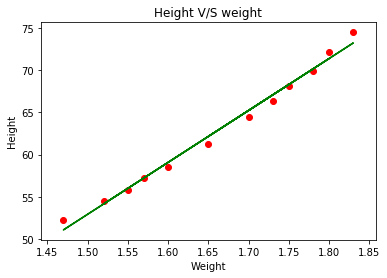

In [83]:
#Visualization--Training set
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='green')
plt.title('Height V/S weight')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

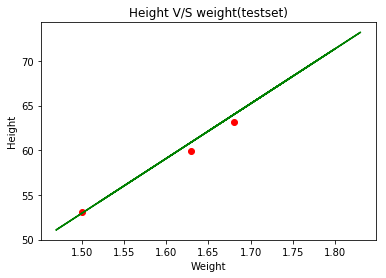

In [84]:
#Visualizations--Test set
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regressor.predict(x_train), color='green')
plt.title('Height V/S weight(testset)')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [85]:
# print the coefficients
print(regressor.intercept_) #c
print(regressor.coef_) #m

-39.256769622671534
[61.45820729]


Interpreting the Height coefficient ( β1 )

A "unit" increase in Height is associated with a 61.45 "unit" increase in weight
#Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets
Note here that the coefficients represent associations, not causations

In [22]:
#import seaborn as sns

In [23]:
#sns.pairplot(data, x_vars=x.astype(int), y_vars=y.astype(int), size=7, aspect=0.7, kind='reg')

In [86]:
import statsmodels.formula.api as smf

In [25]:
#y_pred.conf_int()

In [26]:
#y_pred.score(x, y)

In [88]:
lm1 = smf.ols(formula='Height ~ Weight', data=data).fit()

In [89]:
lm1.conf_int()

,0,1
Intercept,0.585331,0.711590
Weight,0.015133,0.017155


In [90]:
regressor.score(x, y) #this is from SklearnLib

0.9889152493126383

In [30]:
# for stats models code:
# https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

In [91]:
lm1.summary()

C:\Users\Sravani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1190.
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           3.60e-14
Time:                        20:34:29   Log-Likelihood:                 45.735
No. Observations:                  15   AIC:                            -87.47
Df Residuals:                      13   BIC:                            -86.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6485      0.029     22.191      0.000       0.585       0.712
Weight         0.0161      0.000     34.502      0.000       0.015       0.017
==============================================================================
Omnibus:                        1.577   Durbin-Watson:                   0.432
Prob(Omnibus):                  0.454   Jarque-Bera (JB):                1.241
Skew:                          -0.545   Prob(JB):                        0.538
Kurtosis:                       2.107   Cond. No.                         574.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""